In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.9MB/s  eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 45.6MB/s ta 0:00:01
    100% |████████████████████████████████| 7.3MB 7.1MB/s  eta 0:00:01
    100% |████████████████████████████████| 81kB 54.8MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 44.6MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 63.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 10.4MB 4.9MB/s  eta 0:00:01
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateut

In [3]:
import gluonts
gluonts.__version__

'0.4.2'

In [4]:
import mxnet
mxnet.__version__

'1.4.1'

In [5]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [6]:
dataname = "m4_monthly"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_monthly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly/test/data.json


In [7]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [8]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

# check length of the series
print("length train dataset", len(dataset.train))
print("length test dataset", len(dataset.train))


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train dataset 48000
length test dataset 48000


In [9]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 8000.,  8350.,  8570.,  7700.,  7080.,  6520.,  6070.,  6650.,
         6830.,  5710.,  5260.,  5470.,  7870.,  7360.,  8470.,  7880.,
         6750.,  6860.,  6220.,  6650.,  5450.,  5280.,  4970.,  5550.,
         7750.,  7760.,  7190.,  7440.,  6590.,  6210.,  6010.,  6390.,
         5780.,  5700.,  4680.,  4970.,  6850.,  6740.,  7490.,  6250.,
         6900.,  5870.,  5610.,  6310.,  6110.,  6090.,  5810.,  6060.,
         6950.,  7820.,  8270.,  7840.,  7850.,  6710.,  6220.,  7430.,
         6560.,  7080.,  6680.,  6900.,  8680.,  8450.,  8670.,  8470.,
         7910.,  8140.,  7310.,  7860.,  7730.,  7330.,  7430.,  7150.,
         8720.,  8340.,  8840.,  8780.,  8250.,  8180.,  7570.,  9280.,
         9220.,  9140.,  8950.,  8540.,  9360.,  9750.,  9270.,  8690.,
         8200.,  7610.,  7160.,  8280.,  7370.,  7130.,  6840.,  7260.,
         7430.,  7950.,  7790.,  8090.,  7480.,  6700.,  6650.,  6960.,


## Plot Series

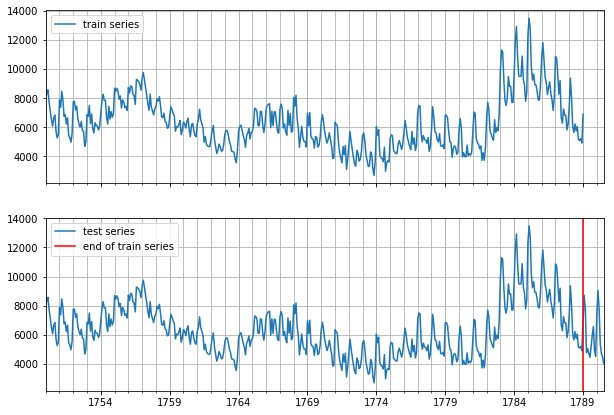

In [10]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [11]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [12]:
######################
### deepar wrapper ###
def deepar(data="m4_quarterly", seed=42, epochs=100, batches=50):

    dataset = get_dataset(data, regenerate=False)
    mx.random.seed(seed)
    np.random.seed(seed)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=batches,
        learning_rate=1e-3,
    )
    
    estimator = DeepAREstimator(
        trainer=trainer,
        cardinality= [
            feat_static_cat.cardinality 
            for feat_static_cat in dataset.metadata.feat_static_cat
        ],
        context_length=dataset.metadata.prediction_length,
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True
    )

    # predictor = estimator.train(training_data=dataset.train,
    #                             validation_data=dataset.test)
    predictor = estimator.train(training_data=dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = batches

    df = pd.DataFrame([output])

    return df

## Results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_hourly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

INFO:root:downloading and processing m4_hourly


Seed: 42
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_hourly/train/data.json


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_hourly/test/data.json


INFO:root:Number of parameters in DeepARTrainingNetwork: 56183
100%|██████████| 200/200 [00:18<00:00, 10.68it/s, avg_epoch_loss=4.44]
INFO:root:Epoch[0] Elapsed time 18.736 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.444627
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.80it/s, avg_epoch_loss=3.89]
INFO:root:Epoch[1] Elapsed time 18.528 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=3.894962
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.78it/s, avg_epoch_loss=3.67]
INFO:root:Epoch[2] Elapsed time 18.551 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.668566
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.74it/s, avg_epoch_loss=3.66]
INFO:root:Epoch[3] Elapsed time 18.631 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.662680
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.80it/s, avg_epoch_l

INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.85it/s, avg_epoch_loss=2.78]
INFO:root:Epoch[37] Elapsed time 18.440 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=2.781310
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.88it/s, avg_epoch_loss=2.75]
INFO:root:Epoch[38] Elapsed time 18.387 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=2.749691
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.83it/s, avg_epoch_loss=2.79]
INFO:root:Epoch[39] Elapsed time 18.471 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=2.787218
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.81it/s, avg_epoch_loss=2.85]
INFO:root:Epoch[40] Elapsed time 18.502 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=2.849780
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.77it/s, avg_epoch_loss=2.72

100%|██████████| 200/200 [00:18<00:00, 10.86it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[73] Elapsed time 18.425 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=2.384036
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 200/200 [00:18<00:00, 10.82it/s, avg_epoch_loss=2.56]
INFO:root:Epoch[74] Elapsed time 18.487 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=2.563763
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 200/200 [00:18<00:00, 10.76it/s, avg_epoch_loss=2.55]
INFO:root:Epoch[75] Elapsed time 18.587 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=2.550812
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 200/200 [00:18<00:00, 10.84it/s, avg_epoch_loss=2.49]
INFO:root:Epoch[76] Elapsed time 18.445 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=2.491209
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 200/200 [00:18<00:00, 10.81it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 200/200 [00:18<00:00, 10.76it/s, avg_epoch_loss=2.3] 
INFO:root:Epoch[109] Elapsed time 18.584 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=2.301101
INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:18<00:00, 10.84it/s, avg_epoch_loss=2.54]
INFO:root:Epoch[110] Elapsed time 18.456 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=2.543780
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:18<00:00, 10.86it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[111] Elapsed time 18.412 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=2.288796
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:18<00:00, 10.87it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[112] Elapsed time 18.404 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=2.373203
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:18<00:00, 10.82it/s, avg_epoch_loss=2.51]
INFO:root:Epoch[1

100%|██████████| 200/200 [00:18<00:00, 10.84it/s, avg_epoch_loss=2.39]
INFO:root:Epoch[145] Elapsed time 18.457 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=2.392665
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.84it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[146] Elapsed time 18.451 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=2.384681
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.85it/s, avg_epoch_loss=2.5] 
INFO:root:Epoch[147] Elapsed time 18.440 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=2.503706
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.81it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[148] Elapsed time 18.509 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=2.428123
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.84it/s, avg_epoch_loss=2.39]
INFO:root:Epoch[149] Elapsed 

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=2.355546
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.96it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[182] Elapsed time 18.244 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=2.285666
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:17<00:00, 11.17it/s, avg_epoch_loss=2.5] 
INFO:root:Epoch[183] Elapsed time 17.901 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=2.500056
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.92it/s, avg_epoch_loss=2.32]
INFO:root:Epoch[184] Elapsed time 18.312 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=2.322595
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.90it/s, avg_epoch_loss=2.5] 
INFO:root:Epoch[185] Elapsed time 18.346 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=2.497549
INFO:root:Epoch[186] Learning rate is 5

100%|██████████| 200/200 [00:18<00:00, 10.91it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[218] Elapsed time 18.343 seconds
INFO:root:Epoch[218] Evaluation metric 'epoch_loss'=2.338663
INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:17<00:00, 11.13it/s, avg_epoch_loss=2.48]
INFO:root:Epoch[219] Elapsed time 17.968 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=2.483503
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 11.04it/s, avg_epoch_loss=2.36]
INFO:root:Epoch[220] Elapsed time 18.120 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=2.364703
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 11.08it/s, avg_epoch_loss=2.41]
INFO:root:Epoch[221] Elapsed time 18.046 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=2.407732
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.88it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[222] Elapsed 

INFO:root:Epoch[254] Evaluation metric 'epoch_loss'=2.414083
INFO:root:Epoch[255] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.78it/s, avg_epoch_loss=2.4] 
INFO:root:Epoch[255] Elapsed time 18.556 seconds
INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=2.402745
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.79it/s, avg_epoch_loss=2.33]
INFO:root:Epoch[256] Elapsed time 18.537 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=2.331492
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.85it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[257] Elapsed time 18.441 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=2.433057
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.82it/s, avg_epoch_loss=2.32]
INFO:root:Epoch[258] Elapsed time 18.480 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=2.318974
INFO:root:Epoch[259] Learning rate is 5

100%|██████████| 200/200 [00:19<00:00, 10.52it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[291] Elapsed time 19.011 seconds
INFO:root:Epoch[291] Evaluation metric 'epoch_loss'=2.311951
INFO:root:Epoch[292] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.53it/s, avg_epoch_loss=2.41]
INFO:root:Epoch[292] Elapsed time 18.992 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=2.409769
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:19<00:00, 10.52it/s, avg_epoch_loss=2.35]
INFO:root:Epoch[293] Elapsed time 19.009 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=2.346770
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.62it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[294] Elapsed time 18.840 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=2.380329
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.63it/s, avg_epoch_loss=2.45]
INFO:root:Epoch[295] Elapsed 

INFO:root:Epoch[327] Evaluation metric 'epoch_loss'=2.362498
INFO:root:Epoch[328] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.79it/s, avg_epoch_loss=2.39]
INFO:root:Epoch[328] Elapsed time 18.539 seconds
INFO:root:Epoch[328] Evaluation metric 'epoch_loss'=2.388941
INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.76it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[329] Elapsed time 18.584 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=2.293227
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.68it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[330] Elapsed time 18.727 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=2.374248
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.71it/s, avg_epoch_loss=2.47]
INFO:root:Epoch[331] Elapsed time 18.669 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=2.468540
INFO:root:Epoch[332] Learning rate is 5

100%|██████████| 200/200 [00:18<00:00, 10.72it/s, avg_epoch_loss=2.35]
INFO:root:Epoch[364] Elapsed time 18.658 seconds
INFO:root:Epoch[364] Evaluation metric 'epoch_loss'=2.348362
INFO:root:Epoch[365] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.77it/s, avg_epoch_loss=2.25]
INFO:root:Epoch[365] Elapsed time 18.571 seconds
INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=2.253275
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.69it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[366] Elapsed time 18.705 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=2.380779
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.78it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[367] Elapsed time 18.554 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=2.336491
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:18<00:00, 10.79it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[368] Elapsed 

Running evaluation: 100%|██████████| 414/414 [00:30<00:00, 13.73it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_hourly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.096396  0.105876  20.262592            0.050981            0.050055   

   seed  epochs  num_batches  
0    42     400          200  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 56183
100%|██████████| 200/200 [00:18<00:00, 10.62it/s, avg_epoch_loss=4.41]
INFO:root:Epoch[0] Elapsed time 18.826 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.413375
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.72it/s, avg_epoch_loss=3.78]
INFO:root:Epoch[1] Elapsed time 18.662 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=3.783010
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.83it/s, avg_epoch_loss=3.59]
INFO:root:Epoch[2] Elapsed time 18.471 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.593867
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.76it/s, avg_epoch_loss=3.42]
INFO:root:Epoch[3] Elapsed time 18.597 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.418649
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.83it/s, avg_epoch_l

INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.81it/s, avg_epoch_loss=2.71]
INFO:root:Epoch[37] Elapsed time 18.509 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=2.713880
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.84it/s, avg_epoch_loss=2.76]
INFO:root:Epoch[38] Elapsed time 18.458 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=2.760539
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.83it/s, avg_epoch_loss=2.7] 
INFO:root:Epoch[39] Elapsed time 18.475 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=2.703120
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:17<00:00, 11.13it/s, avg_epoch_loss=2.68]
INFO:root:Epoch[40] Elapsed time 17.977 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=2.678898
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:18<00:00, 10.85it/s, avg_epoch_loss=2.84

100%|██████████| 200/200 [00:15<00:00, 13.20it/s, avg_epoch_loss=2.44]
INFO:root:Epoch[73] Elapsed time 15.148 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=2.439364
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 200/200 [00:14<00:00, 13.60it/s, avg_epoch_loss=2.55]
INFO:root:Epoch[74] Elapsed time 14.710 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=2.554888
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 200/200 [00:14<00:00, 13.68it/s, avg_epoch_loss=2.48]
INFO:root:Epoch[75] Elapsed time 14.618 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=2.484867
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 200/200 [00:14<00:00, 13.55it/s, avg_epoch_loss=2.47]
INFO:root:Epoch[76] Elapsed time 14.763 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=2.474077
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 200/200 [00:14<00:00, 13.75it/s, avg_epoch_loss=2.52]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 200/200 [00:15<00:00, 13.04it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[109] Elapsed time 15.334 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=2.335066
INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:15<00:00, 12.89it/s, avg_epoch_loss=2.48]
INFO:root:Epoch[110] Elapsed time 15.521 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=2.480045
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:15<00:00, 12.76it/s, avg_epoch_loss=2.36]
INFO:root:Epoch[111] Elapsed time 15.670 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=2.356675
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:15<00:00, 13.08it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[112] Elapsed time 15.291 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=2.371501
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:15<00:00, 12.74it/s, avg_epoch_loss=2.44]
INFO:root:Epoch[1

100%|██████████| 200/200 [00:14<00:00, 13.38it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[145] Elapsed time 14.953 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=2.374904
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.20it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[146] Elapsed time 15.150 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=2.365236
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.57it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[147] Elapsed time 14.740 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=2.431316
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.18it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[148] Elapsed time 15.177 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=2.314989
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.41it/s, avg_epoch_loss=2.48]
INFO:root:Epoch[149] Elapsed 

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=2.447246
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.31it/s, avg_epoch_loss=2.3] 
INFO:root:Epoch[182] Elapsed time 15.024 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=2.299062
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.27it/s, avg_epoch_loss=2.46]
INFO:root:Epoch[183] Elapsed time 15.077 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=2.459442
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.00it/s, avg_epoch_loss=2.27]
INFO:root:Epoch[184] Elapsed time 15.389 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=2.271757
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:16<00:00, 12.43it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[185] Elapsed time 16.092 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=2.429311
INFO:root:Epoch[186] Learning rate is 5

100%|██████████| 200/200 [00:14<00:00, 13.45it/s, avg_epoch_loss=2.35]
INFO:root:Epoch[218] Elapsed time 14.872 seconds
INFO:root:Epoch[218] Evaluation metric 'epoch_loss'=2.352296
INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.08it/s, avg_epoch_loss=2.4] 
INFO:root:Epoch[219] Elapsed time 15.288 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=2.404899
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.35it/s, avg_epoch_loss=2.33]
INFO:root:Epoch[220] Elapsed time 14.983 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=2.332103
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.47it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[221] Elapsed time 14.847 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=2.366469
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.26it/s, avg_epoch_loss=2.25]
INFO:root:Epoch[222] Elapsed 

INFO:root:Epoch[254] Evaluation metric 'epoch_loss'=2.294467
INFO:root:Epoch[255] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.40it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[255] Elapsed time 14.926 seconds
INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=2.384668
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.83it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[256] Elapsed time 14.460 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=2.368115
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.63it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[257] Elapsed time 14.676 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=2.305813
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.36it/s, avg_epoch_loss=2.36]
INFO:root:Epoch[258] Elapsed time 14.975 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=2.359246
INFO:root:Epoch[259] Learning rate is 5

100%|██████████| 200/200 [00:15<00:00, 12.81it/s, avg_epoch_loss=2.4]
INFO:root:Epoch[291] Elapsed time 15.618 seconds
INFO:root:Epoch[291] Evaluation metric 'epoch_loss'=2.397941
INFO:root:Epoch[292] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.04it/s, avg_epoch_loss=2.41]
INFO:root:Epoch[292] Elapsed time 15.342 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=2.410713
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.29it/s, avg_epoch_loss=2.3] 
INFO:root:Epoch[293] Elapsed time 15.051 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=2.301747
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.69it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[294] Elapsed time 14.607 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=2.310981
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.72it/s, avg_epoch_loss=2.35]
INFO:root:Epoch[295] Elapsed t

INFO:root:Epoch[327] Evaluation metric 'epoch_loss'=2.305715
INFO:root:Epoch[328] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.85it/s, avg_epoch_loss=2.2] 
INFO:root:Epoch[328] Elapsed time 15.565 seconds
INFO:root:Epoch[328] Evaluation metric 'epoch_loss'=2.203516
INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.17it/s, avg_epoch_loss=2.42]
INFO:root:Epoch[329] Elapsed time 15.188 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=2.417495
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.81it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[330] Elapsed time 15.609 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=2.293702
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.15it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[331] Elapsed time 15.207 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=2.307412
INFO:root:Epoch[332] Learning rate is 5

100%|██████████| 200/200 [00:15<00:00, 12.89it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[364] Elapsed time 15.516 seconds
INFO:root:Epoch[364] Evaluation metric 'epoch_loss'=2.340694
INFO:root:Epoch[365] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.94it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[365] Elapsed time 15.455 seconds
INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=2.311295
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.85it/s, avg_epoch_loss=2.32]
INFO:root:Epoch[366] Elapsed time 15.570 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=2.319884
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.57it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[367] Elapsed time 14.740 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=2.434059
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.44it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[368] Elapsed 

Running evaluation: 100%|██████████| 414/414 [00:23<00:00, 17.66it/s]
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_hourly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.139156  0.106266  21.493018            0.082193             0.09106   

   seed  epochs  num_batches  
0    43     400          200  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 56183
100%|██████████| 200/200 [00:16<00:00, 12.11it/s, avg_epoch_loss=4.54]
INFO:root:Epoch[0] Elapsed time 16.522 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.539337
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 12.55it/s, avg_epoch_loss=3.91]
INFO:root:Epoch[1] Elapsed time 15.937 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=3.909322
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 13.00it/s, avg_epoch_loss=3.58]
INFO:root:Epoch[2] Elapsed time 15.386 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.575567
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:16<00:00, 12.43it/s, avg_epoch_loss=3.56]
INFO:root:Epoch[3] Elapsed time 16.086 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.560985
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 12.67it/s, avg_epoch_l

INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 12.78it/s, avg_epoch_loss=2.89]
INFO:root:Epoch[37] Elapsed time 15.652 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=2.890037
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 12.88it/s, avg_epoch_loss=2.72]
INFO:root:Epoch[38] Elapsed time 15.526 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=2.715050
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 13.14it/s, avg_epoch_loss=2.66]
INFO:root:Epoch[39] Elapsed time 15.226 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=2.658566
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:14<00:00, 13.64it/s, avg_epoch_loss=2.62]
INFO:root:Epoch[40] Elapsed time 14.665 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=2.619717
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:15<00:00, 13.17it/s, avg_epoch_loss=2.78

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=2.528444
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 200/200 [00:15<00:00, 13.29it/s, avg_epoch_loss=2.42]
INFO:root:Epoch[74] Elapsed time 15.055 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=2.416749
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:14<00:00, 13.34it/s, avg_epoch_loss=2.46]
INFO:root:Epoch[75] Elapsed time 14.997 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=2.461528
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:14<00:00, 13.57it/s, avg_epoch_loss=2.59]
INFO:root:Epoch[76] Elapsed time 14.736 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=2.585694
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:14<00:00, 13.80it/s, avg_epoch_loss=2.5] 
INFO:root:Epoch[77] Elapsed time 14.495 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=2.501696
INFO:root:Epoch[78] Learning rate is 0.0005
100%

INFO:root:Epoch[110] Learning rate is 0.000125
100%|██████████| 200/200 [00:14<00:00, 13.64it/s, avg_epoch_loss=2.39]
INFO:root:Epoch[110] Elapsed time 14.666 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=2.391289
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 200/200 [00:15<00:00, 13.28it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[111] Elapsed time 15.067 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=2.337909
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 200/200 [00:14<00:00, 13.45it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[112] Elapsed time 14.867 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=2.383862
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 200/200 [00:14<00:00, 13.60it/s, avg_epoch_loss=2.42]
INFO:root:Epoch[113] Elapsed time 14.710 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=2.422786
INFO:root:Loading parameters from best epoch (93)
INFO:root:Epoch[114] Learning rate is 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.35it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[146] Elapsed time 14.984 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=2.425731
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 12.70it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[147] Elapsed time 15.749 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=2.286400
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.36it/s, avg_epoch_loss=2.44]
INFO:root:Epoch[148] Elapsed time 14.973 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=2.440750
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.35it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[149] Elapsed time 14.984 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=2.338517
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:14<00:00, 13.47it/s, avg_ep

100%|██████████| 200/200 [00:13<00:00, 14.97it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[182] Elapsed time 13.362 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=2.336548
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.87it/s, avg_epoch_loss=2.32]
INFO:root:Epoch[183] Elapsed time 13.451 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=2.323149
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.94it/s, avg_epoch_loss=2.32]
INFO:root:Epoch[184] Elapsed time 13.393 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=2.321355
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.99it/s, avg_epoch_loss=2.33]
INFO:root:Epoch[185] Elapsed time 13.347 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=2.329903
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.95it/s, avg_epoch_loss=2.36]
INFO:root:Epoch[186] Elapsed 

INFO:root:Epoch[218] Evaluation metric 'epoch_loss'=2.341619
INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.03it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[219] Elapsed time 13.311 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=2.287980
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.92it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[220] Elapsed time 13.402 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=2.314367
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.03it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[221] Elapsed time 13.306 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=2.377594
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.96it/s, avg_epoch_loss=2.36]
INFO:root:Epoch[222] Elapsed time 13.368 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=2.356119
INFO:root:Epoch[223] Learning rate is 5

100%|██████████| 200/200 [00:13<00:00, 14.99it/s, avg_epoch_loss=2.36]
INFO:root:Epoch[255] Elapsed time 13.340 seconds
INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=2.359325
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.99it/s, avg_epoch_loss=2.25]
INFO:root:Epoch[256] Elapsed time 13.347 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=2.251177
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.00it/s, avg_epoch_loss=2.34]
INFO:root:Epoch[257] Elapsed time 13.331 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=2.335233
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.00it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[258] Elapsed time 13.339 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=2.309326
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.00it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[259] Elapsed 

INFO:root:Epoch[291] Evaluation metric 'epoch_loss'=2.390114
INFO:root:Epoch[292] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.01it/s, avg_epoch_loss=2.3] 
INFO:root:Epoch[292] Elapsed time 13.329 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=2.297803
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.06it/s, avg_epoch_loss=2.32]
INFO:root:Epoch[293] Elapsed time 13.282 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=2.316392
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.03it/s, avg_epoch_loss=2.24]
INFO:root:Epoch[294] Elapsed time 13.312 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=2.242876
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 15.05it/s, avg_epoch_loss=2.39]
INFO:root:Epoch[295] Elapsed time 13.294 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=2.387684
INFO:root:Epoch[296] Learning rate is 5

100%|██████████| 200/200 [00:13<00:00, 15.00it/s, avg_epoch_loss=2.26]
INFO:root:Epoch[328] Elapsed time 13.331 seconds
INFO:root:Epoch[328] Evaluation metric 'epoch_loss'=2.264296
INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.98it/s, avg_epoch_loss=2.33]
INFO:root:Epoch[329] Elapsed time 13.350 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=2.330560
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.96it/s, avg_epoch_loss=2.25]
INFO:root:Epoch[330] Elapsed time 13.374 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=2.245427
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.88it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[331] Elapsed time 13.440 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=2.428283
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.96it/s, avg_epoch_loss=2.33]
INFO:root:Epoch[332] Elapsed 

INFO:root:Epoch[364] Evaluation metric 'epoch_loss'=2.238813
INFO:root:Epoch[365] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.98it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[365] Elapsed time 13.354 seconds
INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=2.291138
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.99it/s, avg_epoch_loss=2.31]
INFO:root:Epoch[366] Elapsed time 13.345 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=2.308763
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.98it/s, avg_epoch_loss=2.24]
INFO:root:Epoch[367] Elapsed time 13.356 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=2.239692
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.96it/s, avg_epoch_loss=2.36]
INFO:root:Epoch[368] Elapsed time 13.369 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=2.357340
INFO:root:Epoch[369] Learning rate is 5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.136299  0.103567  20.780737            0.060215             0.01952   

   seed  epochs  num_batches  
0    44     400          200  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.096396,0.105876,20.262592,0.050981,0.050055,42,400,200
0,1.139156,0.106266,21.493018,0.082193,0.091060,43,400,200
0,1.136299,0.103567,20.780737,0.060215,0.019520,44,400,200


In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_daily", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

INFO:root:downloading and processing m4_daily


Seed: 42
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_daily/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_daily/test/data.json


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.47it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[0] Elapsed time 7.557 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=6.865995
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.72it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[1] Elapsed time 7.777 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.439175
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.74it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[2] Elapsed time 7.771 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.253159
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.02it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[3] Elapsed time 7.689 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.150072
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.78it/s, avg_e

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=5.438132
INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.77it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[37] Elapsed time 7.762 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.415165
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.05it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[38] Elapsed time 7.680 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.431236
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.94it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[39] Elapsed time 7.711 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.429202
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.83it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[40] Elapsed time 7.744 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.462094
INFO:root:Epoch[41] Learning rate is 0.001
100%|████████

100%|██████████| 200/200 [00:07<00:00, 25.95it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[73] Elapsed time 7.707 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.397149
INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.82it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[74] Elapsed time 7.748 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.365674
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.90it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[75] Elapsed time 7.725 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.405572
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.84it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[76] Elapsed time 7.742 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.377344
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.81it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[77] Elapsed time 7.749 seco

100%|██████████| 200/200 [00:07<00:00, 25.85it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[109] Elapsed time 7.739 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.347565
INFO:root:Epoch[110] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.71it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[110] Elapsed time 7.779 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.343336
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.70it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[111] Elapsed time 7.784 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.327003
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.80it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[112] Elapsed time 7.754 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.362721
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.80it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[113] 

INFO:root:Epoch[145] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.06it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[145] Elapsed time 7.675 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=5.362348
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.77it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[146] Elapsed time 7.764 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.336364
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.76it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[147] Elapsed time 7.766 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.362326
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.42it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[148] Elapsed time 7.869 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.346776
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_

INFO:root:Epoch[181] Evaluation metric 'epoch_loss'=5.329818
INFO:root:Epoch[182] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.86it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[182] Elapsed time 7.735 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.362196
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.51it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[183] Elapsed time 7.841 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.316510
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.73it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[184] Elapsed time 7.775 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.385541
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.89it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[185] Elapsed time 7.725 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.316449
INFO:root:Epoch[186] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 25.92it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[218] Elapsed time 7.718 seconds
INFO:root:Epoch[218] Evaluation metric 'epoch_loss'=5.342164
INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.18it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[219] Elapsed time 7.641 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.344542
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.64it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[220] Elapsed time 7.803 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.340729
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.05it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[221] Elapsed time 7.678 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.339808
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[222] Elapsed time

INFO:root:Epoch[255] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.58it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[255] Elapsed time 7.820 seconds
INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=5.341703
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.72it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[256] Elapsed time 7.778 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.323276
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.60it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[257] Elapsed time 7.815 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.306781
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.95it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[258] Elapsed time 7.708 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.347449
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.78it/s, avg_epoch_

INFO:root:Epoch[291] Evaluation metric 'epoch_loss'=5.339519
INFO:root:Epoch[292] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.52it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[292] Elapsed time 8.160 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.327095
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.56it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[293] Elapsed time 7.825 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.318584
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.66it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[294] Elapsed time 7.797 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.307965
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.89it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[295] Elapsed time 7.728 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.343214
INFO:root:Epoch[296] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 25.82it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[328] Elapsed time 7.748 seconds
INFO:root:Epoch[328] Evaluation metric 'epoch_loss'=5.353453
INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.58it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[329] Elapsed time 7.821 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.302252
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.97it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[330] Elapsed time 7.702 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.367734
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.36it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[331] Elapsed time 7.887 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.277438
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.66it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[332] Elapsed time 

INFO:root:Epoch[365] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.75it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[365] Elapsed time 7.767 seconds
INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=5.347711
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.47it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[366] Elapsed time 7.854 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.296021
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.74it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[367] Elapsed time 7.772 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.345148
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[368] Elapsed time 7.719 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.320368
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_l

  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 245073


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.369378  0.032103  38.577975            0.028813            0.012933   

   seed  epochs  num_batches  
0    42     400          200  
Seed: 43


100%|██████████| 200/200 [00:07<00:00, 26.76it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[0] Elapsed time 7.476 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.272206
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.53it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[1] Elapsed time 7.837 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.398123
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.34it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[2] Elapsed time 7.893 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.259893
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.67it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[3] Elapsed time 7.792 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.185941
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.67it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[4] Elapsed time 7.794 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:07<00:00, 25.57it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[37] Elapsed time 7.824 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.443702
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.51it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[38] Elapsed time 7.842 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.470541
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.62it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[39] Elapsed time 7.808 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.444073
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.52it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[40] Elapsed time 7.840 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.457675
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.51it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[41] Elapsed time 7.842 second

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.77it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[74] Elapsed time 7.763 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.357178
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.39it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[75] Elapsed time 7.879 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.412270
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.52it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[76] Elapsed time 7.838 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.368421
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.51it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[77] Elapsed time 7.843 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.400391
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.72it/s, avg_epoch_loss=5.36

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:07<00:00, 25.73it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[110] Elapsed time 7.774 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.402219
INFO:root:Loading parameters from best epoch (70)
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.57it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[111] Elapsed time 7.824 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.332104
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.79it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[112] Elapsed time 7.755 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.408665
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.17it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[113] Elapsed time 7.948 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.333739
INFO:root:Epoch[114] Learning rate is 5e-05
100%|███

100%|██████████| 200/200 [00:07<00:00, 25.52it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[146] Elapsed time 7.839 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.359717
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.36it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[147] Elapsed time 7.888 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.386857
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.84it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[148] Elapsed time 7.743 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.342380
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.18it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[149] Elapsed time 7.944 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.374258
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.43it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.65it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[183] Elapsed time 7.799 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.357562
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.89it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[184] Elapsed time 7.726 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.353508
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.77it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[185] Elapsed time 7.761 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.354376
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.61it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[186] Elapsed time 7.809 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.330923
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.92it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.332852
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.64it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[220] Elapsed time 7.802 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.375465
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.36it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[221] Elapsed time 7.887 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.328999
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.75it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[222] Elapsed time 7.769 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.375836
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.48it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[223] Elapsed time 7.850 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.308037
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 25.69it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[256] Elapsed time 7.785 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.323850
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.77it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[257] Elapsed time 7.763 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.361447
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.56it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[258] Elapsed time 7.826 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.320392
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.67it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[259] Elapsed time 7.794 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.353011
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.54it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.35it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[293] Elapsed time 7.891 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.353335
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.47it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[294] Elapsed time 7.855 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.310031
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.57it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[295] Elapsed time 7.822 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.314686
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.89it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[296] Elapsed time 7.726 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.336258
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.63it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.334614
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.71it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[330] Elapsed time 7.780 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.290434
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.54it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[331] Elapsed time 7.832 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.323623
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.34it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[332] Elapsed time 7.894 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.292817
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.75it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[333] Elapsed time 7.769 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.371616
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 25.79it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[366] Elapsed time 7.757 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.322982
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.57it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[367] Elapsed time 7.822 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.312981
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.65it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[368] Elapsed time 7.799 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.321125
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.01it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[369] Elapsed time 7.691 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.277890
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.68it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[370] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.276089  0.031394  39.324629            0.027701            0.012482   

   seed  epochs  num_batches  
0    43     400          200  
Seed: 44


100%|██████████| 200/200 [00:07<00:00, 26.85it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[0] Elapsed time 7.451 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=6.847021
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.88it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[1] Elapsed time 7.728 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.387433
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.83it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[2] Elapsed time 7.745 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.202960
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.85it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[3] Elapsed time 7.739 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.138357
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.91it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[4] Elapsed time 7.719 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:07<00:00, 25.62it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[37] Elapsed time 7.809 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.415504
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.54it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[38] Elapsed time 7.833 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=5.455003
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.52it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[39] Elapsed time 7.837 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=5.417168
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.36it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[40] Elapsed time 7.887 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.460522
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.79it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[41] Elapsed time 7.757 second

100%|██████████| 200/200 [00:07<00:00, 25.75it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[74] Elapsed time 7.769 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=5.379162
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.46it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[75] Elapsed time 7.855 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=5.387807
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.92it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[76] Elapsed time 7.716 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.386992
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.57it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[77] Elapsed time 7.823 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=5.347846
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 200/200 [00:07<00:00, 25.92it/s, avg_epoch_loss

100%|██████████| 200/200 [00:07<00:00, 25.57it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[110] Elapsed time 7.823 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=5.359346
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 25.56it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[111] Elapsed time 7.827 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.349478
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 26.12it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[112] Elapsed time 7.659 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.362484
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 25.83it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[113] Elapsed time 7.744 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=5.356520
INFO:root:Loading parameters from best epoch (103)
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.72

INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=5.372363
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.74it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[146] Elapsed time 7.771 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=5.300904
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.81it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[147] Elapsed time 7.749 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=5.361555
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.93it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[148] Elapsed time 7.716 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.337261
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.79it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[149] Elapsed time 7.756 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=5.334483
INFO:root:Epoch[150] Learning rate is 5e-05


100%|██████████| 200/200 [00:07<00:00, 25.41it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[182] Elapsed time 7.873 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=5.371426
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.39it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[183] Elapsed time 7.877 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=5.320592
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.13it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[184] Elapsed time 7.961 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.357872
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.72it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[185] Elapsed time 7.776 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=5.315155
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.79it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[186] Elapsed time

INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.69it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[219] Elapsed time 7.787 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=5.310173
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.71it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[220] Elapsed time 7.780 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.320141
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.36it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[221] Elapsed time 7.888 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=5.317403
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.75it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[222] Elapsed time 7.769 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.343203
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.63it/s, avg_epoch_

INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=5.333525
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.35it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[256] Elapsed time 7.891 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.294821
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.54it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[257] Elapsed time 7.833 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=5.366710
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.74it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[258] Elapsed time 7.770 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.293773
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.65it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[259] Elapsed time 7.798 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.350066
INFO:root:Epoch[260] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 25.83it/s, avg_epoch_loss=5.36]
INFO:root:Epoch[292] Elapsed time 7.746 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=5.356003
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.69it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[293] Elapsed time 7.786 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=5.301635
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.70it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[294] Elapsed time 7.785 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.375454
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.69it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[295] Elapsed time 7.787 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.275746
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.44it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[296] Elapsed time 

INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.65it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[329] Elapsed time 7.800 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=5.353221
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.37it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[330] Elapsed time 7.886 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.273025
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.55it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[331] Elapsed time 7.829 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.341216
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.93it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[332] Elapsed time 7.714 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.301040
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.66it/s, avg_epoch_l

INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=5.304109
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.69it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[366] Elapsed time 7.785 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.310280
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.81it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[367] Elapsed time 7.749 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.296906
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.89it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[368] Elapsed time 7.725 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.327751
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.73it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[369] Elapsed time 7.774 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.286094
INFO:root:Epoch[370] Learning rate is 5e-05


       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.822969  0.034721  46.19845            0.032228             0.01467    44   

   epochs  num_batches  
0     400          200  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,3.369378,0.032103,38.577975,0.028813,0.012933,42,400,200
0,3.276089,0.031394,39.324629,0.027701,0.012482,43,400,200
0,3.822969,0.034721,46.198450,0.032228,0.014670,44,400,200


In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_hourly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_hourly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 56183
100%|██████████| 200/200 [00:13<00:00, 14.33it/s, avg_epoch_loss=4.44]
INFO:root:Epoch[0] Elapsed time 13.960 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.444627
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.42it/s, avg_epoch_loss=3.89]
INFO:root:Epoch[1] Elapsed time 13.868 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=3.894962
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.49it/s, avg_epoch_loss=3.67]
INFO:root:Epoch[2] Elapsed time 13.801 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.668566
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.40it/s, avg_epoch_loss=3.66]
INFO:root:Epoch[3] Elapsed time 13.889 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.662680
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.49it/s, avg_epoch_l

INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.33it/s, avg_epoch_loss=2.78]
INFO:root:Epoch[37] Elapsed time 13.959 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=2.781310
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.45it/s, avg_epoch_loss=2.75]
INFO:root:Epoch[38] Elapsed time 13.838 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=2.749691
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.41it/s, avg_epoch_loss=2.79]
INFO:root:Epoch[39] Elapsed time 13.881 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=2.787218
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.44it/s, avg_epoch_loss=2.85]
INFO:root:Epoch[40] Elapsed time 13.856 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=2.849780
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:13<00:00, 14.44it/s, avg_epoch_loss=2.72

100%|██████████| 200/200 [00:13<00:00, 14.49it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[73] Elapsed time 13.801 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=2.384036
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 200/200 [00:13<00:00, 14.46it/s, avg_epoch_loss=2.56]
INFO:root:Epoch[74] Elapsed time 13.833 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=2.563763
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 200/200 [00:13<00:00, 14.46it/s, avg_epoch_loss=2.55]
INFO:root:Epoch[75] Elapsed time 13.837 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=2.550812
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 200/200 [00:13<00:00, 14.35it/s, avg_epoch_loss=2.49]
INFO:root:Epoch[76] Elapsed time 13.941 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=2.491209
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 200/200 [00:13<00:00, 14.44it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 200/200 [00:13<00:00, 14.40it/s, avg_epoch_loss=2.3] 
INFO:root:Epoch[109] Elapsed time 13.889 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=2.301101
INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:13<00:00, 14.47it/s, avg_epoch_loss=2.54]
INFO:root:Epoch[110] Elapsed time 13.826 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=2.543780
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:13<00:00, 14.50it/s, avg_epoch_loss=2.29]
INFO:root:Epoch[111] Elapsed time 13.791 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=2.288796
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:13<00:00, 14.45it/s, avg_epoch_loss=2.37]
INFO:root:Epoch[112] Elapsed time 13.845 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=2.373203
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:13<00:00, 14.43it/s, avg_epoch_loss=2.51]
INFO:root:Epoch[1

100%|██████████| 200/200 [00:13<00:00, 14.49it/s, avg_epoch_loss=2.39]
INFO:root:Epoch[145] Elapsed time 13.808 seconds
INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=2.392665
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.50it/s, avg_epoch_loss=2.38]
INFO:root:Epoch[146] Elapsed time 13.792 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=2.384681
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:13<00:00, 14.52it/s, avg_epoch_loss=2.5] 
INFO:root:Epoch[147] Elapsed time 13.773 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=2.503706
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.00it/s, avg_epoch_loss=2.43]
INFO:root:Epoch[148] Elapsed time 15.383 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=2.428123
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:15<00:00, 13.06it/s, avg_epoch_loss=2.39]
INFO:root:Epoch[149] Elapsed 

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_weekly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_yearly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results

In [ ]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly", seed=i, epochs=400, batches=200)
    pprint(df)
    results = results.append(df)

results